# EHRI Geospatial Repository

Michal Frankl

Masaryk Institute and Archives, Czech Academy of Sciences

[frankl@mua.cas.cz](frankl@mua.cas.cz)

![EHRI logo](https://ehri.cz/images/ehri-logo.svg)

## European Holocaust Research Infrastructure (EHRI)

- Research infrastructure: provides data and services to researchers
- Launched 2010, will become a permanent, distributed European research infrastructure by early 2025
- Services:
    - EHRI Portal (https://portal.ehri-project.eu/)
    - EHRI editions
    - EHRI Document Blog (https://blog.ehri-project.eu/)
    - EHRI Research Guides (https://portal.ehri-project.eu/guides)
    - EHRI Dashboard (https://dashboard.ehri-project-stage.eu/)
    - EHRI Training site and MOOC
- Fellowships and workshops
- Works together with other RIs (for instance CLARIN)

<!-- 
- broader change in historiography (and humanities more broadly): digital turn
-->

### EHRI Portal

![EHRI Portal](resources/EHRI_portal.png)

### EHRI Editions

![EHRI example early testimony](resources/EHRI_early_testimony.png)

### EHRI Document Blog

![EHRI Document Blog - no man's land](resources/EHRI_blog_NML.png)

### EHRI Geospatial Repository (https://geodata.ehri-project.eu/)

- response to user demands (focus groups, surveys) for data and training
- open data, FAIR principles
- using geospatial standards and services
- versatile, usage agnostic
- launched 2023, still in an early phase

![EHRI Georepository](resources/EHRI_georepository.png)

## Search

- Fulltext search (example: [Prague](https://geodata.ehri-project.eu/geonetwork/srv/eng/catalog.search#/search?any=Prague&from=1&to=30))
- Facetted browse
- Map selection

## Map making

![Map](resources/georepository_map.png)

## Available datasets

- Historical borders
- Concentration camps
- Raster maps (only examples)
- Local histories of the Holocaust

### Historical borders

![European borders on April 30, 1938](resources/repository_borders.png)


### Concentration camps

![European borders on April 30, 1938](resources/repository_camps.png)


### Raster maps (examples, links to online catalogue)

![European borders on April 30, 1938](resources/repository_raster.png)


### Local histories of the Holocaust

![European borders on April 30, 1938](resources/repository_memento.png)


## Example dataset: ["Incidents" in Prague](https://geodata.ehri-project.eu/geonetwork/srv/eng/catalog.search#/metadata/71f1b57c-1704-482b-b041-d39cdc29bc30)

- description
- sources and limits
- structure
- license
- data via standard services

## Integration into research workflows

- Direct use in GIS software
- Example: Data analysis in Jupyter notebook
    - "Incidents" and prohibited spaces in Prague
    - Were Jews caught and investigated close to public spaces declared inaccessible?

In [1]:
import geopandas as gpd
import requests
import geojson
from pyproj import CRS
from owslib.wfs import WebFeatureService
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
### Fetch data via EHRI Geoserver WFS

def ehri_wfs(layer):
    # EHRI WFS service
    url = "https://geodata.ehri-project.eu/geoserver/wfs"

    # Specify parameters (read data in json format).
    params = dict(
        service="WFS",
        version="2.0.0",
        request="GetFeature",
        typeName=layer,
        outputFormat="json",
        srsName = "EPSG:4326"
    )

    # Fetch data from WFS using requests
    r = requests.get(url, params=params)
    return(gpd.GeoDataFrame.from_features(geojson.loads(r.content), crs="EPSG:3067"))

### Load datasets

In [4]:
districts = ehri_wfs("ehri:MGS-prague_districts_borders-v1")
incidents = ehri_wfs("ehri:MGS-prague_incidents-v1-eng")
inaccessible = ehri_wfs("MGS-prague_inaccessible_places-v1-cze")

<AxesSubplot: >

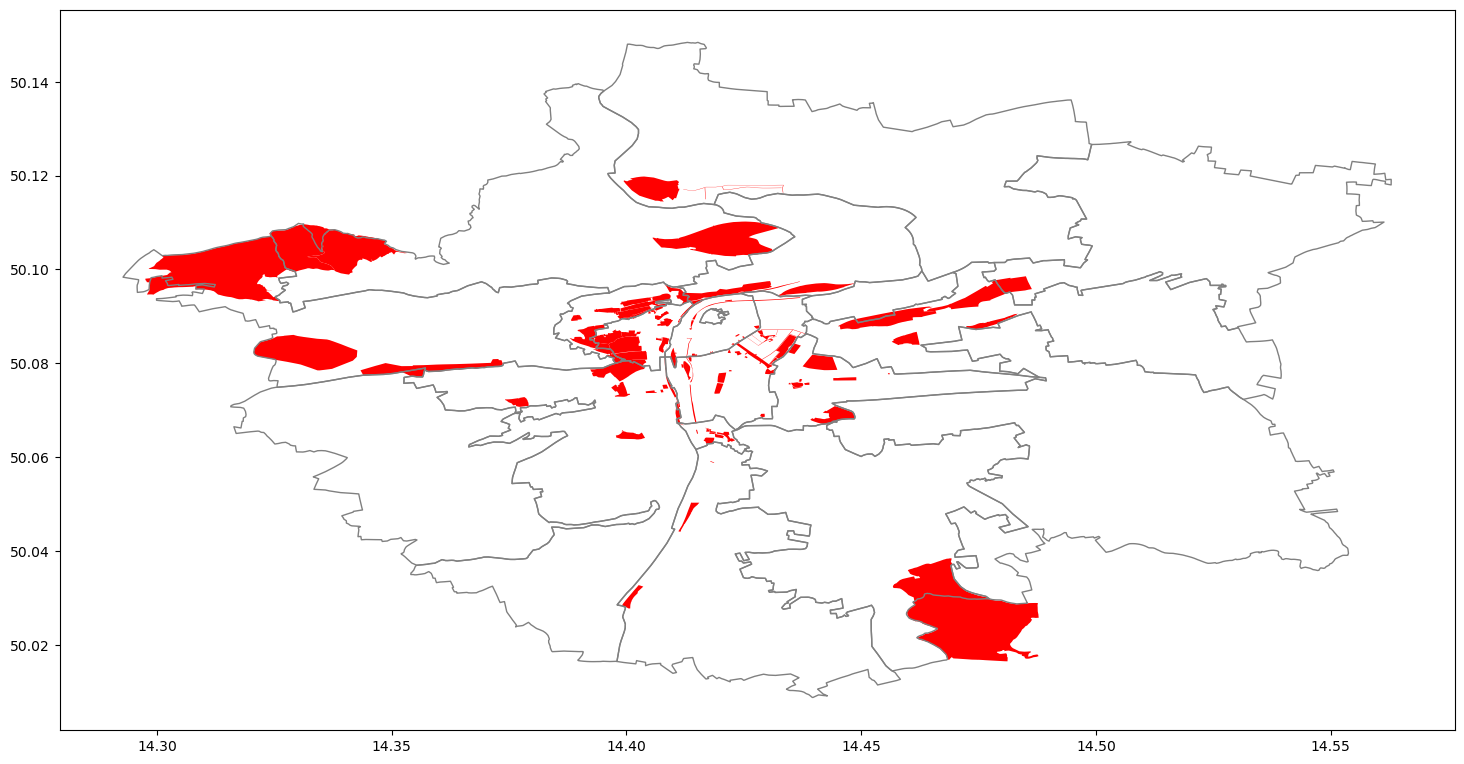

In [6]:
fig, ax = plt.subplots(figsize=(18, 18))
inaccessible.plot(ax=ax, facecolor="red")
districts.plot(facecolor="none", edgecolor='grey', ax=ax)

### Incidents

In [8]:
incidents.head()

,geometry,label_en,description_en,type_1_en,spec_1_en,type_2_en,spec_2_en,date,place_en,documents_en
0,POINT (14.428 50.085),Eduard Adler: Arrested for violating an anti-J...,None,prohibited public spaces,vicinity of the commodity exhange building,None,None,09.12.1941,"Prague II, Nekázanka",https://www.holocaust.cz/databaze-dokumentu/do...
1,POINT (14.428 50.079),Ervín Adler: Arresting for lacking identity card.,Hadn''t procured the necessary documents. Fine...,personal documents,missing identity card,None,None,22.09.1941,"Prague II, Krakovská 14",https://www.holocaust.cz/databaze-dokumentu/do...
2,POINT (14.453 50.103),Evžen Adler: Arrested for not having his ident...,"Fine of 2,000 crowns or 14 days in jail. Paid ...",personal documents,"letter ""J"" on identity card",None,None,24.04.1941,"Prague VII, Na Maninách 24",https://www.holocaust.cz/databaze-dokumentu/do...
3,POINT (14.456 50.084),Herma Adlerová: Arrested in order to be deported.,"Her permant residence was in Tachov, which was...",regulations for foreigners,expulsion/prohibition of residency,None,None,23.08.1939,"Prague XI, Lupáčova 12",https://www.holocaust.cz/databaze-dokumentu/do...
4,POINT (14.456 50.075),Růžena Adlerová: Arrested for not having her d...,"Fine of 2,000 crowns or 5 days in jail. Paid t...",personal documents,"letter ""J"" on identity card",None,None,19.05.1941,"Prague XII, Sobotecká 9",https://www.holocaust.cz/databaze-dokumentu/do...


In [10]:
xmin, ymin, xmax, ymax = districts.total_bounds

<AxesSubplot: >

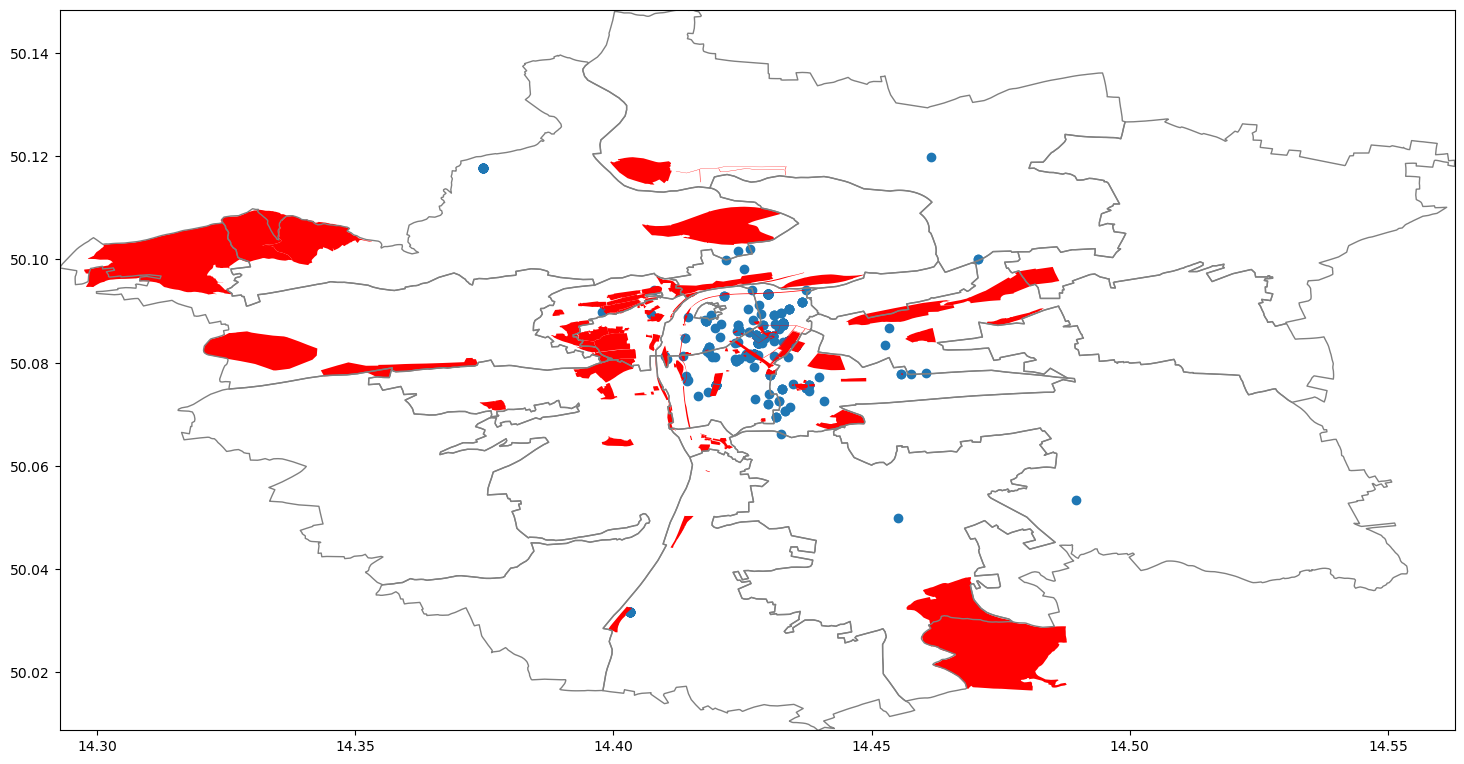

In [11]:
fig, ax = plt.subplots(figsize=(18, 18))
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
incidents[incidents.type_1_en=='prohibited public spaces'].plot(ax=ax)
inaccessible.plot(ax=ax, facecolor="red")
districts.plot(facecolor="none", edgecolor='grey', ax=ax)

## EHRI Geospatial Repository - community effort

- Relies on contributions from research community
- Possibility to deposit research dataset, project results, etc.
- Offers help with standardization, licensing
- Sharing of best practices

- Documentation: https://documentation.ehri-project.eu/en/latest/geospatial/
- [geodata@ehri-project.eu](geodata@ehri-project.eu)